# Principal Component Analysis comparison of distinct testing periods

This notebook preforms principal component analysis (PCA) of datasets discussed in the thesis. By doing so, the most variant dimensions of the dataset can be visualized in 2D.

Principal component analysis aims to extract the most significant dimensions of variance in a dataset. A usecase for such analysis is to reduce the dimension of a dataset in order to make readable plots in 2D or 3D. Here, PCA is performed on a set of training points. The PCA transformation is then applied to two separate phases of testing data, each in which fouling is presumed to increase over time. This is performed for two different datasets.

The hope is that change in 2D operating point over time may tell something about the degree of fouling. Unfortunately, when pricipal components are extracted from the dataset, physical meanings such as units are lost. Therefore, it can be difficult to interpret and derive meaning from the resulting plots. A possible explaination of the results can be seen below.

For each dataset, a new PCA is fitted using the same features in the same order. Ideally, the resulting plots should have somewhat similar significant directions and thus be comparable. Unfortunately, placing the same columns in the same order may not result in the same significant dimensions being selected by the PCA.

Finally, a single PCA transformation trained on dataset F or G is performed on the opposite dataset, enabling comparisons accross the two.

# Dataset D

## Step 0: Import modules

In [1]:
# %load example_pca_plot.py
import src.core as mlApi
import src.core_configs as configs

Using TensorFlow backend.


## Step 1: Define dataset specifics

In [2]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigD('180min')
datasetName = "D Simulated"

# Part 1 of the testing period
testtime1 = [
    "2020-04-01 00:00:00",
    "2020-05-05 00:00:00"
]

# Part 2 of the testing period
testtime2 = [
    "2020-05-06 00:00:00",
    "2020-08-01 00:00:00",
]

## Step 2: Initiate and divide data

In [3]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Op

## Step 3: Perform PCA using PCA plots

In [4]:
print("Finding PCA plot for dataset "+datasetName)
print(" ")

Finding PCA plot for dataset D Simulated
 


### Training data

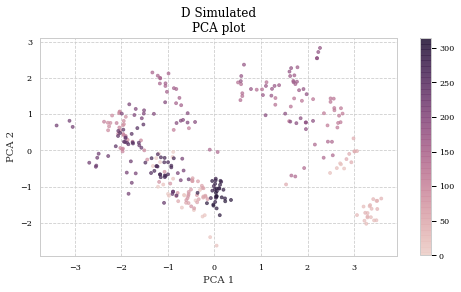

In [5]:
mlApi.pcaPlot(df_train, plotTitle=datasetName)

## Training data scatter plot, dataset D
the training points are plotted with the color darkness gradually increasing for the duration of the training set. This is done in order to provide reference for the below graphs, in which all training points are plotted in red in order to reduce confusion.

Do note that as the number of training points in the simulated dataset is rather low and the set values (e.g. flow) are regulated quite drastically, it is expected to see some distinct groupings and jumps in both the training and test set

### Testing data

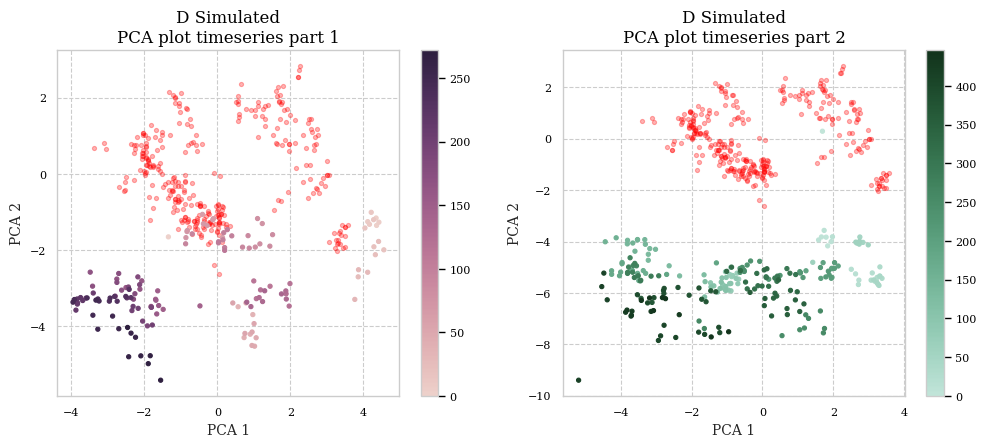

In [6]:
# 4. Plot scatter plot of testing data
mlApi.pcaDuoPlot(df_train, df_test_1, df_test_2, plotTitle=datasetName)

## Testing data scatter plot,  dataset 2
In the above plots, the color darkness of the points gradually increase. For part 1, this color ranges from light pink at the beginning to dark purple at the end. For part 2, the color is light green at the beginning and dark green at the end. Training points are the same, plotted in red, for both plots. For reference, use the previously mentioned plot of the training set distribution.

It appears increased levels of fouling move the data points to the left and downwards. It is difficult to interpret what the directions may mean directly from the plot. Inspecting the dataset columns in the notebook regarding dataset profiling may suggest one axis represents Process Flow and the other axis represents a combination of Coolant features, as these are the two groups of variables that vary independently.

In [7]:
# Reset to prepare for second dataset
# -------------------------------------
mlApi.reset()
# -------------------------------------

# Dataset F

In [8]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigF('180min')
datasetName = "F"

testtime = [
    ["2018-01-01 00:00:00", "2019-05-01 00:00:00"]
]

testtime1 = [
    "2018-09-25 00:00:00",
    "2018-12-10 00:00:00"
]

testtime2 = [
    "2019-02-15 00:00:00",
    "2019-05-01 00:00:00",
]

In [9]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

In [10]:
print("Finding PCA plot for dataset "+datasetName)
print(" ")

Finding PCA plot for dataset F
 


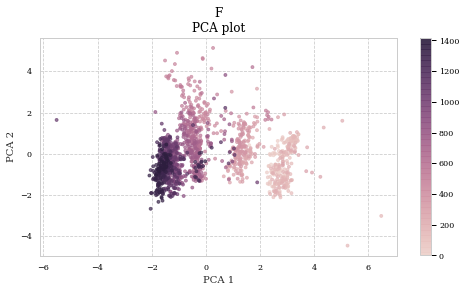

In [11]:
mlApi.pcaPlot(df_train, plotTitle=datasetName)

## Training data scatter plot, dataset F
The training points are plotted with the color darkness gradually increasing for the duration of the training set. This is done in order to provide reference for the below graphs, in which all training points are plotted in red in order to reduce confusion

Ignoring some outliers, it appears the dataset is gradually moving towards the left as the timeseries progresses, with continuous variation in the y-direction. Knowing that the flow rate of the processing field is increasing throughout this time, it appears somewhat logical that some of this variation can be explained by increased production volumes. Apart from this, there is little meaning to made only by looking at the training points.

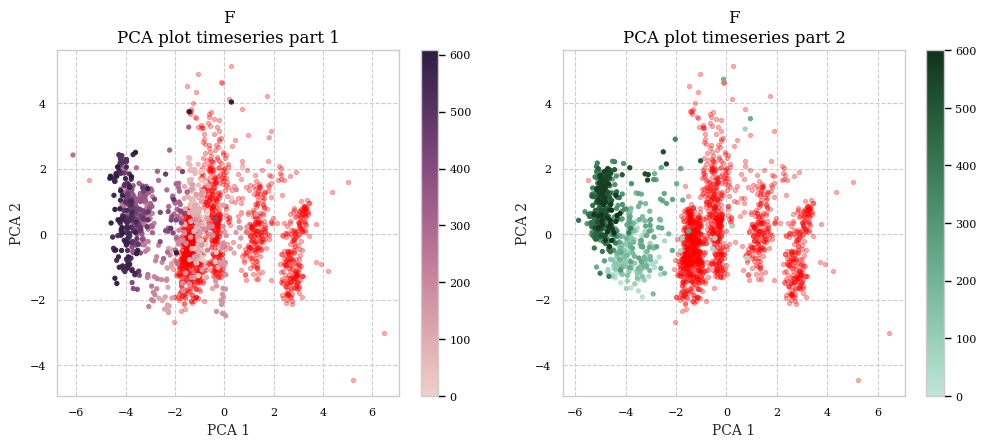

In [12]:
mlApi.pcaDuoPlot(df_train, df_test_1, df_test_2, datasetName)

## Test data scatter plot, dataset F
In the above plots, the color darkness of the points gradually increase. For part 1, this color ranges from light pink at the beginning to dark purple at the end. For part 2, the color is light green at the beginning and dark green at the end. Training points are the same, plotted in red, for both plots. For reference, use the previously mentioned plot of the training set distribution.

As mentioned initially, it appears difficult to say anything specifically about the development of heat exchanger fouling by looking at the PCA plots. Even so, some interesting trends can be seen. The first timeseries gradually trends towards the left. Following the switch to a clean heat exchanger, the initial points of the second time series have moved slightly compared to the end points of the first time series. The point of operation then moves slightly upwards and to the left over a period of time. This trend could be interpreted as gradual fouling in the heat exchanger, although this is only suggested and by no means validated by these findings.

In [13]:
# Reset to prepare for second dataset
# -------------------------------------
mlApi.reset()
# -------------------------------------

# Dataset G

In [14]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigG('180min')
datasetName = "G"

testtime = [
	"2017-01-01 00:00:00",
	"2020-03-01 00:00:00",
]


testtime1 = [
    "2019-02-01 00:00:00",
    "2019-04-01 00:00:00",
]

testtime2 = [
    "2019-09-01 00:00:00",
    "2019-11-10 00:00:00",
]

In [15]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 801 rows

Finding data

In [16]:
print("Finding PCA plot for dataset "+datasetName)
print(" ")

Finding PCA plot for dataset G
 


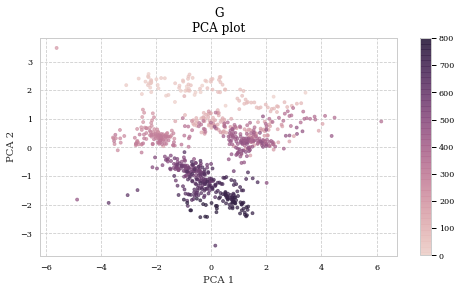

In [17]:
mlApi.pcaPlot(df_train, plotTitle=datasetName)

## Training data scatter plot, dataset G

The training points are plotted with the color darkness gradually increasing for the duration of the training set. This is done in order to provide reference for the below graphs, in which all training points are plotted in red in order to reduce confusion

It appears the dataset is gradually moving downwards as the timeseries progresses, with continuous variation in the x-direction. This differs from what was discovered for *dataset F*, where the gradual change happened in the x-direction with continued variation in the y-direction.

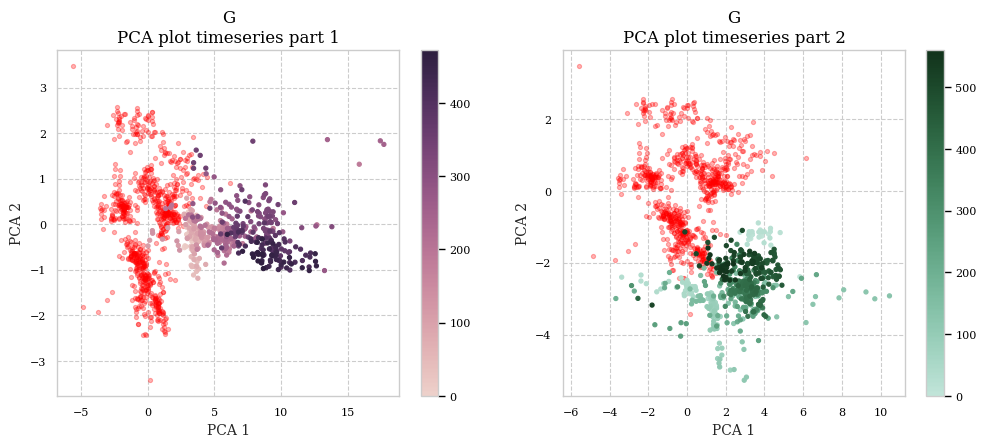

In [18]:
mlApi.pcaDuoPlot(df_train, df_test_1, df_test_2, datasetName)

## Testing data scatter plot, dataset G

In the above plots, the color darkness of the points gradually increase. For part 1, this color ranges from light pink at the beginning to dark purple at the end. For part 2, the color is light green at the beginning and dark green at the end. Training points are the same, plotted in red, for both plots. For reference, use the previously mentioned plot of the training set distribution.

For the first testing phase, the operating point is moving further towards the right. Meanwhile, the second testing phase is hardly moving at all; if anything slightly upwards. There is no clear correlation between the two testing phases, and no clear relations to the PCA plots of previous datasets.

# Cross-use of PCA

As mentioned, using the same columns may not lead to the same principal components being used. Therefore, the same PCA is used for dataset F and G in order to see if there are any relations in their change of operating point.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
    
def plotPCA(train, test1, test2, dftrain, dftest1, dftest2, plotTitle=None):
    df_train1 = pd.DataFrame(data = train, index=dftrain.index, columns=['pca1', 'pca2'])
    df_test1 = pd.DataFrame(data = test1, index=dftest1.index, columns=['pca1', 'pca2'])
    df_test2 = pd.DataFrame(data = test2, index=dftest2.index, columns=['pca1', 'pca2'])

    fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=100)
    fig.tight_layout(w_pad=3.0)

    ax, ax2 = axs

    ax.set_xlabel('PCA 1', fontsize=10)
    ax.set_ylabel('PCA 2', fontsize=10)
    ax.set_title(((plotTitle + '\n') if plotTitle is not None else '') + 'PCA plot timeseries part 1', fontsize=12)
    cmap1 = sns.cubehelix_palette(reverse=False, as_cmap=True)
    cmap2 = sns.cubehelix_palette(reverse=False, start=50.0, rot=0.1, as_cmap=True)
    index1 = list(range(df_test1.shape[0]))
    index2 = list(range(df_test2.shape[0]))
    ax.scatter(df_train1['pca1'], df_train1['pca2'], c = 'red', alpha=0.3)
    points1 = ax.scatter(df_test1['pca1'], df_test1['pca2'], c = index1, cmap = cmap1, alpha=1.0)

    fig.colorbar(points1, ax=ax)

    ax2.set_xlabel('PCA 1', fontsize=10)
    ax2.set_ylabel('PCA 2', fontsize=10)
    ax2.set_title(((plotTitle + '\n') if plotTitle is not None else "") + 'PCA plot timeseries part 2', fontsize=12)
    cmap1 = sns.cubehelix_palette(reverse=False, as_cmap=True)
    cmap2 = sns.cubehelix_palette(reverse=False, start=50.0, rot=0.1, as_cmap=True)
    index1 = list(range(df_test1.shape[0]))
    index2 = list(range(df_test2.shape[0]))
    ax2.scatter(df_train1['pca1'], df_train1['pca2'], c = 'red', alpha=0.3)
    points2 = ax2.scatter(df_test2['pca1'], df_test2['pca2'], c = index2, cmap = cmap2, alpha=1.0)

    fig.colorbar(points2, ax=ax2)
    plt.show()

In [20]:
mlApi.reset()

In [21]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigF('180min')
datasetName = "F"

testtime = [
    ["2018-01-01 00:00:00", "2019-05-01 00:00:00"]
]

testtime1 = [
    "2018-09-25 00:00:00",
    "2018-12-10 00:00:00"
]

testtime2 = [
    "2019-02-15 00:00:00",
    "2019-05-01 00:00:00",
]

In [22]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

f_train_vals = df_train.values
f_sc = StandardScaler()
f_sc.fit(f_train_vals)
f_train_vals_scaled = f_sc.transform(f_train_vals)

pca = PCA(n_components=2)
pca.fit(f_train_vals_scaled)

f_train = pca.transform(f_sc.transform(df_train.values))
f_test_1 = pca.transform(f_sc.transform(df_test_1.values))
f_test_2 = pca.transform(f_sc.transform(df_test_2.values))

f_df_train = df_train
f_df_test_1 = df_test_1
f_df_test_2 = df_test_2

In [24]:
mlApi.reset()

In [25]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigG('180min')
datasetName = "G"

testtime = [
	"2017-01-01 00:00:00",
	"2020-03-01 00:00:00",
]


testtime1 = [
    "2019-02-01 00:00:00",
    "2019-04-01 00:00:00",
]

testtime2 = [
    "2019-09-01 00:00:00",
    "2019-11-10 00:00:00",
]

In [26]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 801 rows

Finding data

In [27]:
g_train_vals = df_train.values
g_sc = StandardScaler()
g_sc.fit(g_train_vals)
g_train_vals_scaled = g_sc.transform(g_train_vals)

g_train = pca.transform(g_sc.transform(df_train.values))
g_test_1 = pca.transform(g_sc.transform(df_test_1.values))
g_test_2 = pca.transform(g_sc.transform(df_test_2.values))

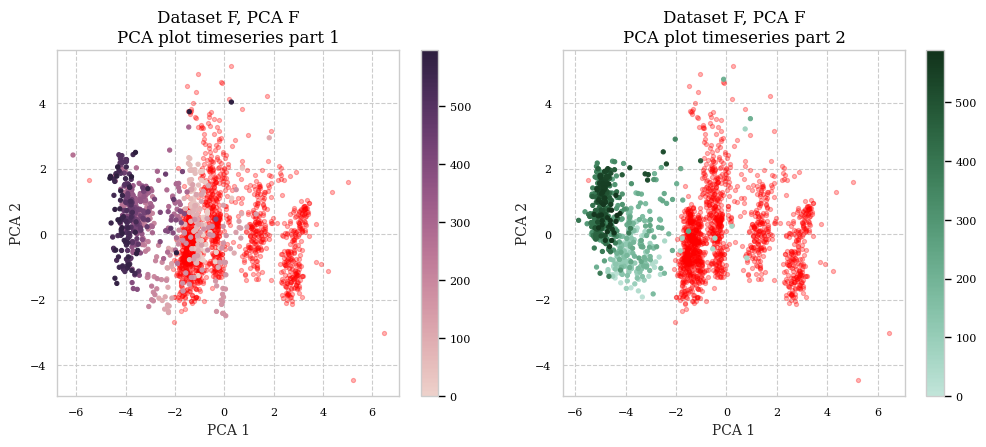

In [28]:
plotPCA(f_train, f_test_1, f_test_2, f_df_train, f_df_test_1, f_df_test_2, "Dataset F, PCA F")

## Dataset F with PCA fitted to dataset F

This is the same plot as seen and discussed previously for dataset F.

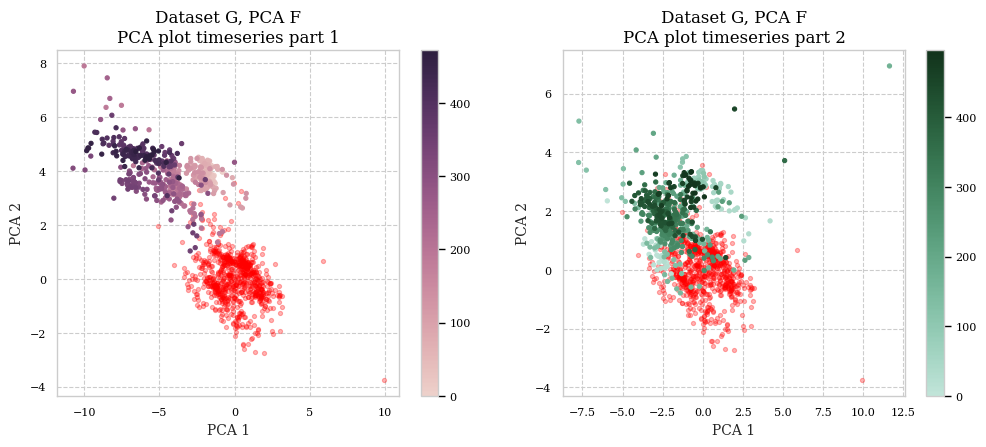

In [29]:
plotPCA(g_train, g_test_1, g_test_2, df_train, df_test_1, df_test_2, "Dataset G, PCA F")

## Dataset G with PCA fitted to dataset F

Notice that the first testing period in the left plot has a significantly lower x-axis value and significantly higher y-axis value than the training points plotted in red. Even so, it appears to be moving towards the left as fouling increases, same as what was discovered for dataset F. In the right plot, the operating point is much closer to the training area and not moving as much as the timeseries progresses.

Once more, without knowledge regarding what variation each axis represents, it is difficult to determine whether this type of plot will be useful in identifying fouling. If anything, it appears to be capable of tracking a 2D operating point over time.

In [30]:
mlApi.reset()

In [31]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigG('180min')
datasetName = "G"

testtime = [
	"2017-01-01 00:00:00",
	"2020-03-01 00:00:00",
]


testtime1 = [
    "2019-02-01 00:00:00",
    "2019-04-01 00:00:00",
]

testtime2 = [
    "2019-09-01 00:00:00",
    "2019-11-10 00:00:00",
]

In [32]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 801 rows

Finding data

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

g_train_vals = df_train.values
g_sc = StandardScaler()
g_sc.fit(g_train_vals)
g_train_vals_scaled = g_sc.transform(g_train_vals)

pca = PCA(n_components=2)
pca.fit(g_train_vals_scaled)

g_train = pca.transform(g_sc.transform(df_train.values))
g_test_1 = pca.transform(g_sc.transform(df_test_1.values))
g_test_2 = pca.transform(g_sc.transform(df_test_2.values))

g_df_train = df_train
g_df_test_1 = df_test_1
g_df_test_2 = df_test_2

In [34]:
mlApi.reset()

In [35]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigF('180min')
datasetName = "F"

testtime = [
    ["2018-01-01 00:00:00", "2019-05-01 00:00:00"]
]

testtime1 = [
    "2018-09-25 00:00:00",
    "2018-12-10 00:00:00"
]

testtime2 = [
    "2019-02-15 00:00:00",
    "2019-05-01 00:00:00",
]

In [36]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

In [37]:
f_train_vals = df_train.values
f_sc = StandardScaler()
f_sc.fit(f_train_vals)
f_train_vals_scaled = f_sc.transform(f_train_vals)

f_train = pca.transform(f_sc.transform(df_train.values))
f_test_1 = pca.transform(f_sc.transform(df_test_1.values))
f_test_2 = pca.transform(f_sc.transform(df_test_2.values))

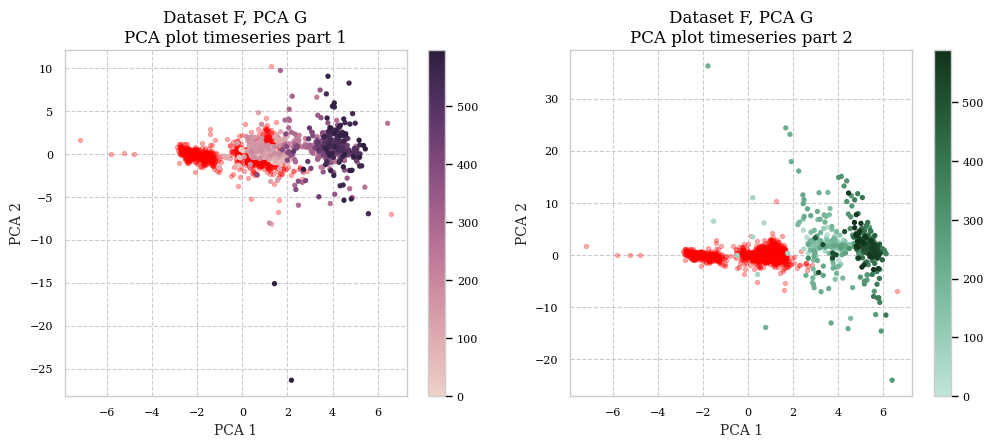

In [38]:
plotPCA(f_train, f_test_1, f_test_2, df_train, df_test_1, df_test_2, "Dataset F, PCA G")

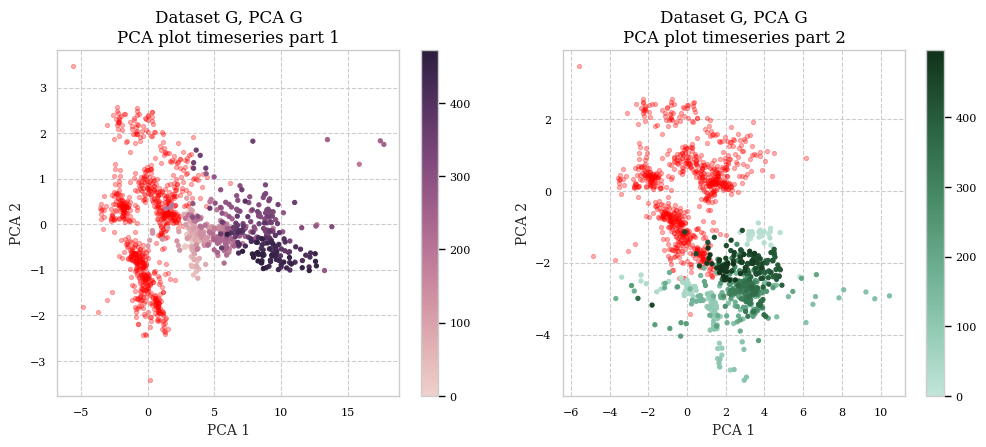

In [39]:
plotPCA(g_train, g_test_1, g_test_2, g_df_train, g_df_test_1, g_df_test_2, "Dataset G, PCA G")

# Conclusion

Although it seems possible to use PCA for tracking changes in operating point over time, it is difficult to relate these changes to increases in fouling. The operating point may change due to many factors, such as increases in production volume over time, differences in coolant temperature due to time of year, and other factors.

PCA may prove useful if datasets can be obtained containing a series of confirmed heat exchanger washes with fouling present at the time of maintenance. If consecutive washes show the same change in operating point, it may be suspected that this change in operating point is partly or entirely because of heat exchanger fouling.